# 神经网络基础

## 2.1 二分分类

1 (cat) vs 0 (non cat)

$(x,y)$: $x\in\mathbb{R}^{n_{x}}, y\in\{1,0\}$

$
x^{(m)}=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{n_{x}} \\
\end{bmatrix}, y\in\{1,0\}
$





### m training examples vs test examples:

$m=m_{train}$

$\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}),\ldots, (x^{(m)}, y^{(m)})\}$

$m_{test}=\#test\ examples$

$\{(x^{(1)}, \hat{y}^{(1)}), (x^{(2)}, \hat{y}^{(1)}),\ldots, (x^{(m)}, \hat{y}^{(1)})\}$

$m_{real}$

$\{(x^{(1)}, ?), (x^{(2)}, ?),\ldots, (x^{(m)}, ?\}$


### parameters 

选择合适的数据格式标识可以提高计算效率，结果更清晰

$X=
\begin{bmatrix}
\vdots & \vdots & \vdots& \vdots \\
\vdots & \vdots & \vdots& \vdots \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
\vdots & \vdots & \vdots& \vdots \\
\vdots & \vdots & \vdots& \vdots \\
\end{bmatrix}, X\in\mathbb{R}^{n_{x}\times m}
$

$Y=[\ y^{(1)},\ \ \ y^{(2)},\ \ \ldots,\ \ y^{(m)}],\ \ Y\in\mathbb{R}^{1\times m}$, Y.shape=(1,m)

In [1]:
import numpy as np
X=np.random.randn(5,6)
print(X.shape)

(5, 6)


## 2.2 Logistic Regression (Logistic 回归)

Given x, want $\hat{y}=P(y=1|x)$, $\hat{y}\in[0,1]$

$\hat{y}$ 表示预测值，相当于关于x的概率函数，当x满足条件时候y=1。

$x\in\mathbb{R}^{n_{x}}$

Parameters: $w\in\mathbb{R}^{n_{x}}$, $b\in\mathbb{R}$

Output: $\hat{y}=\sigma(w^{T}x+b)$, $\sigma(z)=\frac{1}{1+e^{-z}}$

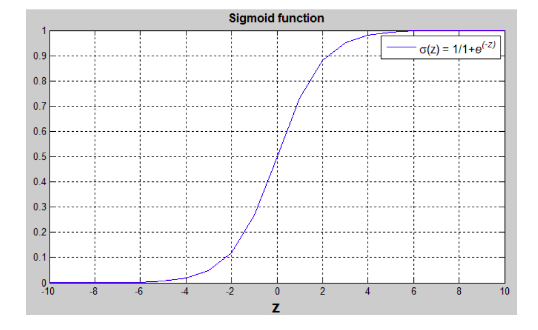

## 2.3 Logistic Regression Cost Function

$\hat{y}=\sigma(w^{T}x+b)$, where $\sigma(z)=\frac{1}{1+e^{-z}}$

Given $\{(x^{(1)}, y^{(1)}),(x^{(2)}, y^{(2)}),\ldots,(x^{(m)}, y^{(m)})\}$, want $\hat{y}^{(i)}\approx y^{(i)}$

### Loss (error) function:

一般情况：$\mathcal{L}(\hat{y}, y)=\frac{1}{2}(\hat{y}-y)^2$

对于Logistic Regression 函数有不同

$\mathcal{L}(\hat{y},y)=-(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})})$

If $y=1$: $\mathcal{L}(\hat{y},y)=-\log{\hat{y}}$     $\longleftarrow$ want $\log\hat{y}$ large, want $\hat{y}$ large

If $y=0$: $\mathcal{L}(\hat{y},y)=-\log{(1-\hat{y})}$ $\longleftarrow$ want $\log(1-\hat{y})$ large, want $\hat{y}$ small

$\mathcal{L}(\hat{y}, y)=-\log{(\hat{y})}$ $\longleftarrow(y=1)$

$\mathcal{L}(\hat{y}, y)=-\log{(1-\hat{y})}$ $\longleftarrow(y=0)$

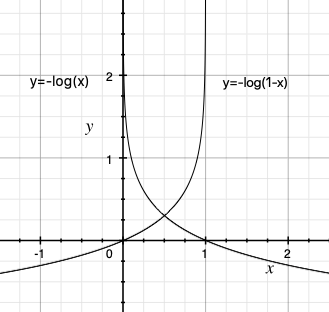

### Cost function

$\mathcal{J}(w,b)=\frac{1}{m}\sum\limits_{i=1}^{m}\mathcal{L}(\hat{y}^{(i)},y^{(i)})=-\frac{1}{m}\sum\limits_{i=1}^{m}\big[(y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})\big] $

## 2.4 Gradient Descent (梯度下降法)

> convex function(凸函数) <br>non-convex（非凸函数）<br>initialize(初始化)<br>initial value（初始值）



先不考虑b

假定：$w\longrightarrow \mathcal{J}(w)$ 线性关系如下图，（实际w为多维向量）
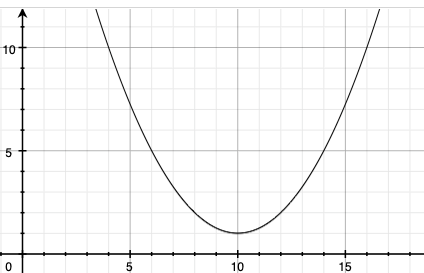

$w:=w-\alpha \frac{\mathrm{d}\mathcal{J}(w)}{\mathrm{d}w}$

* "$:=$": 表示w值更新

* $\alpha$: 学习率/步长

* $\frac{\mathrm{d}\mathcal{J}(w)}{\mathrm{d}w}$: 导数, 通常用变量名dw表示；

when $w>w_{min}$, $\frac{\mathrm{d}\mathcal{J}(w)}{\mathrm{d}w}>0$, $-\frac{\mathrm{d}\mathcal{J}(w)}{\mathrm{d}w}<0$, $\longleftarrow$: 左移

when $w<w_{min}$, $\frac{\mathrm{d}\mathcal{J}(w)}{\mathrm{d}w}<0$, $-\frac{\mathrm{d}\mathcal{J}(w)}{\mathrm{d}w}>0$, $\longrightarrow$: 右移

repeat action （重复动作）"w:="

$w$收敛于最小值点$w_{min}$。

$(w, b) \longrightarrow \mathcal{J}(w,b)$

$w:=w-\alpha\frac{\partial\mathcal{J}(w,b)}{\partial{w}}$

$b:=b-\alpha\frac{\partial\mathcal{J}(w,b)}{\partial{b}}$

## 2.9 Logistic Regression Gradient descent

$X=\begin{bmatrix}x_1\\x_2\\w_1\\w_2\\b\end{bmatrix}$

$z=w_1x_1+w_2x_2+b \longrightarrow a=\sigma{(z)} \longrightarrow \mathcal{L}(a,y)=-(y\log{a}+(1-y)\log{(1-a)})$

$\frac{\partial\mathcal{L}(a,y)}{\partial{a}}=-(\frac{y}{a}-\frac{1-y}{1-a})=-\frac{y}{a}+\frac{1-y}{1-a}$

$a=\sigma(z)=\frac{1}{1+e^{-z}}, \frac{\mathrm{d}a}{\mathrm{d}z}=\frac{e^{-z}}{(1+e^{-z})^2}=\frac{1}{1+e^{-z}}\cdot (\frac{1+e^{-z}}{1+e^{-z}}-\frac{1}{1+e^{-z}})=a(1-a)$

$\frac{\mathrm{d}\mathcal{L}}{\mathrm{d}z}=\frac{\partial\mathcal{L}(a,y)}{\partial{a}}\cdot\frac{\mathrm{d}a}{\mathrm{d}z}=a-y$

## 2.12 More vectorization examples

* 尽量避免for循环（低效）
* 使用矩阵

$u=Av, A\in\mathbb{R}^{i\times j}, v\in\mathbb{R}^{1\times j}$

$x=\begin{bmatrix}v_1\\ \vdots \\ v_n\end{bmatrix}$

$u=\begin{bmatrix}e^{v_1} \\ \vdots \\ e^{v_m} \end{bmatrix}$

$u=np.exp(v)$

In [7]:
import numpy as np

x = np.ones((5,1))*2

print(x)

[[2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [8]:
y = np.exp(x)
print(y)

[[7.3890561]
 [7.3890561]
 [7.3890561]
 [7.3890561]
 [7.3890561]]


## 2.14 Vectorizing Logistic Regression